In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [1]:
git remote add origin https://github.com/guhan93/binary-image-classification-using-neural-networks.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-1-8b96a3e0528e>, line 1)

In [2]:
img= image.load_img("C:/Users/ASUS/Desktop/imageclassifer/basedata/training/guhan/3.jpg")

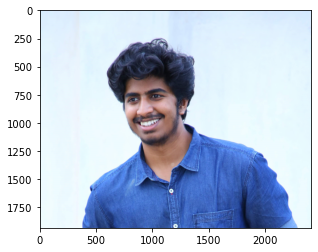

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/ASUS/Desktop/imageclassifer/basedata/training/guhan/3.jpg")

array([[[254, 237, 216],
        [254, 237, 216],
        [254, 237, 216],
        ...,
        [255, 231, 211],
        [255, 231, 211],
        [255, 231, 211]],

       [[254, 237, 216],
        [254, 237, 216],
        [254, 237, 216],
        ...,
        [255, 231, 211],
        [255, 231, 211],
        [255, 231, 211]],

       [[253, 236, 215],
        [253, 236, 215],
        [253, 236, 215],
        ...,
        [255, 231, 211],
        [255, 231, 211],
        [255, 231, 211]],

       ...,

       [[255, 252, 237],
        [255, 252, 237],
        [255, 252, 237],
        ...,
        [254, 250, 232],
        [254, 250, 232],
        [254, 250, 232]],

       [[255, 252, 237],
        [255, 252, 237],
        [255, 252, 237],
        ...,
        [254, 250, 232],
        [254, 250, 232],
        [254, 250, 232]],

       [[255, 252, 238],
        [255, 252, 238],
        [255, 252, 238],
        ...,
        [254, 250, 232],
        [254, 250, 232],
        [254, 250, 232]]

In [5]:
cv2.imread("C:/Users/ASUS/Desktop/imageclassifer/basedata/training/guhan/3.jpg").shape

(1932, 2409, 3)

In [18]:
train = ImageDataGenerator(rescale=1/255,shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
validation=ImageDataGenerator(rescale=1/255,shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [19]:
train_dataset= train.flow_from_directory('C:/Users/ASUS/Desktop/imageclassifer/basedata/training/',
                                        target_size=(200,200),
                                        batch_size=5,
                                        class_mode='binary')

validation_dataset= train.flow_from_directory('C:/Users/ASUS/Desktop/imageclassifer/basedata/validation/',
                                        target_size=(200,200),
                                        batch_size=5,
                                        class_mode='binary')

Found 62 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'guhan': 0, 'srithi': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
model=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

In [24]:
early_stopping= tf.keras.callbacks.EarlyStopping(patience=2)

model_fit=model.fit(train_dataset,
                   steps_per_epoch=5,
                   epochs=50,
                   validation_data=validation_dataset,verbose =2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 5 steps
Epoch 1/50
5/5 - 7s - loss: 3.3968 - accuracy: 0.7200 - val_loss: 0.8283 - val_accuracy: 0.5238
Epoch 2/50
5/5 - 4s - loss: 0.7191 - accuracy: 0.3636 - val_loss: 0.7442 - val_accuracy: 0.5238
Epoch 3/50
5/5 - 4s - loss: 0.6931 - accuracy: 0.6818 - val_loss: 0.7235 - val_accuracy: 0.5238
Epoch 4/50
5/5 - 5s - loss: 0.6670 - accuracy: 0.6000 - val_loss: 0.7062 - val_accuracy: 0.5238
Epoch 5/50
5/5 - 4s - loss: 0.6634 - accuracy: 0.6818 - val_loss: 0.8244 - val_accuracy: 0.5238
Epoch 6/50
5/5 - 4s - loss: 0.6320 - accuracy: 0.6364 - val_loss: 2.0912 - val_accuracy: 0.5238
Epoch 7/50
5/5 - 5s - loss: 0.9236 - accuracy: 0.5200 - val_loss: 0.6954 - val_accuracy: 0.5714
Epoch 8/50
5/5 - 5s - loss: 0.6215 - accuracy: 0.6800 - val_loss: 0.6038 - val_accuracy: 0.5714
Epoch 9/50
5/5 - 4s - loss: 0.6723 - accuracy: 0.6400 - val_loss: 1.2513 - val_accuracy: 0.5238
Epoch 10/50
5/5 - 5s - loss: 0.6706 - accuracy

10.jpg


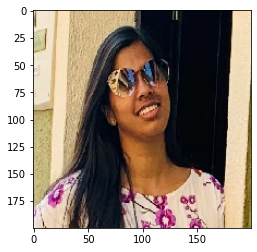

this is srithika
101.jpeg


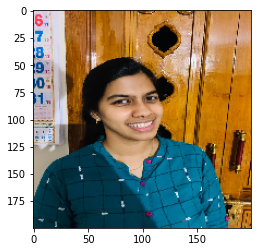

this is guhan
11.jpg


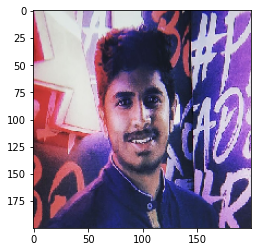

this is srithika
12.jpg


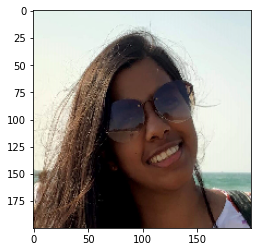

this is srithika
13.jpg


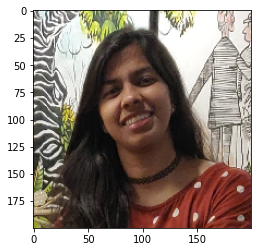

this is srithika
15.jpg


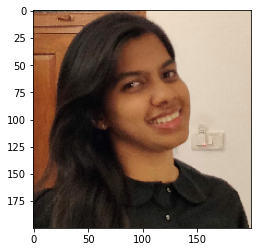

this is srithika
2.jpg


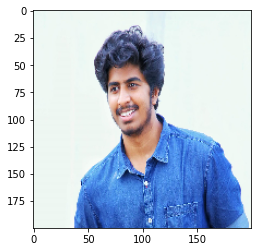

this is guhan
25.jpg


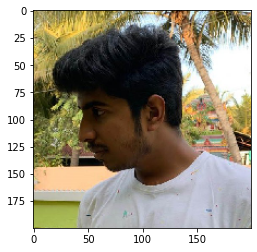

this is srithika
28.jpg


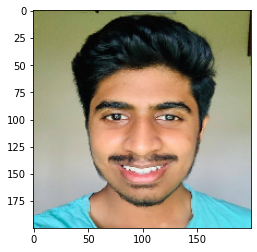

this is guhan
30.jpg


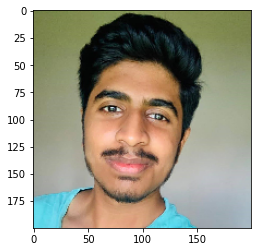

this is guhan
37.jpg


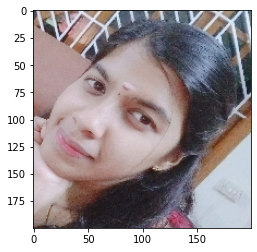

this is srithika
39.jpg


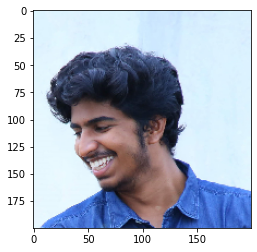

this is guhan
41.jpg


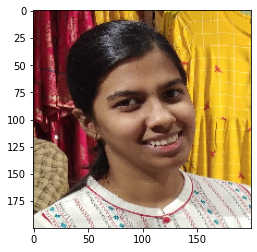

this is srithika
5.jpg


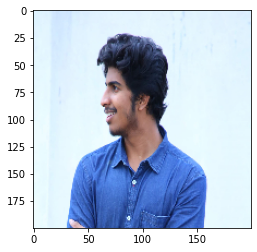

this is guhan
50.jpg


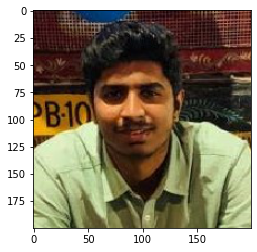

this is srithika
desktop.ini


OSError: cannot identify image file 'C:/Users/ASUS/Desktop/imageclassifer/basedata/testing//desktop.ini'

In [26]:
dir_path='C:/Users/ASUS/Desktop/imageclassifer/basedata/testing'

for i in os.listdir(dir_path):
    print(i)
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    
    val=model.predict(images)
    if val==0:
        print("this is guhan")
    else:
        print("this is srithika")